___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

pd.options.display.max_rows=200
pd.options.display.max_columns=200

In [2]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
        X = X.values  # convert dataframe to a numpy array
    # 0.05 (5%) based on paper by Lawson and Jures
    sample_size = int(X.shape[0] * ratio)

    # a uniform random sample in the original data space
    X_uniform_random_sample = uniform(
        X.min(axis=0), X.max(axis=0), (sample_size, X.shape[1]))

    # a random sample of size sample_size from the original data X
    random_indices = sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    # initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(X)

    # u_distances = nearest neighbour distances from uniform random sample
    u_distances, u_indices = nbrs.kneighbors(
        X_uniform_random_sample, n_neighbors=2)
    # distance to the first (nearest) neighbour
    u_distances = u_distances[:, 0]

    # w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances, w_indices = nbrs.kneighbors(X_sample, n_neighbors=2)
    # distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[:, 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    # compute and return hopkins' statistic
    H = u_sum / (u_sum + w_sum)
    return H

#### Load Dataset

In [3]:
df1=pd.read_csv("Mall_Customers.csv")
df1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df=df1.copy()

#### Explore Data

You can rename columns to more usable, if you need.

In [5]:
df.rename(columns={"Annual Income (k$)" : "Annual_Income" , "Spending Score (1-100)" : "Spending_Score" } , inplace=True)

In [6]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.isnull().any()

CustomerID        False
Gender            False
Age               False
Annual_Income     False
Spending_Score    False
dtype: bool

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





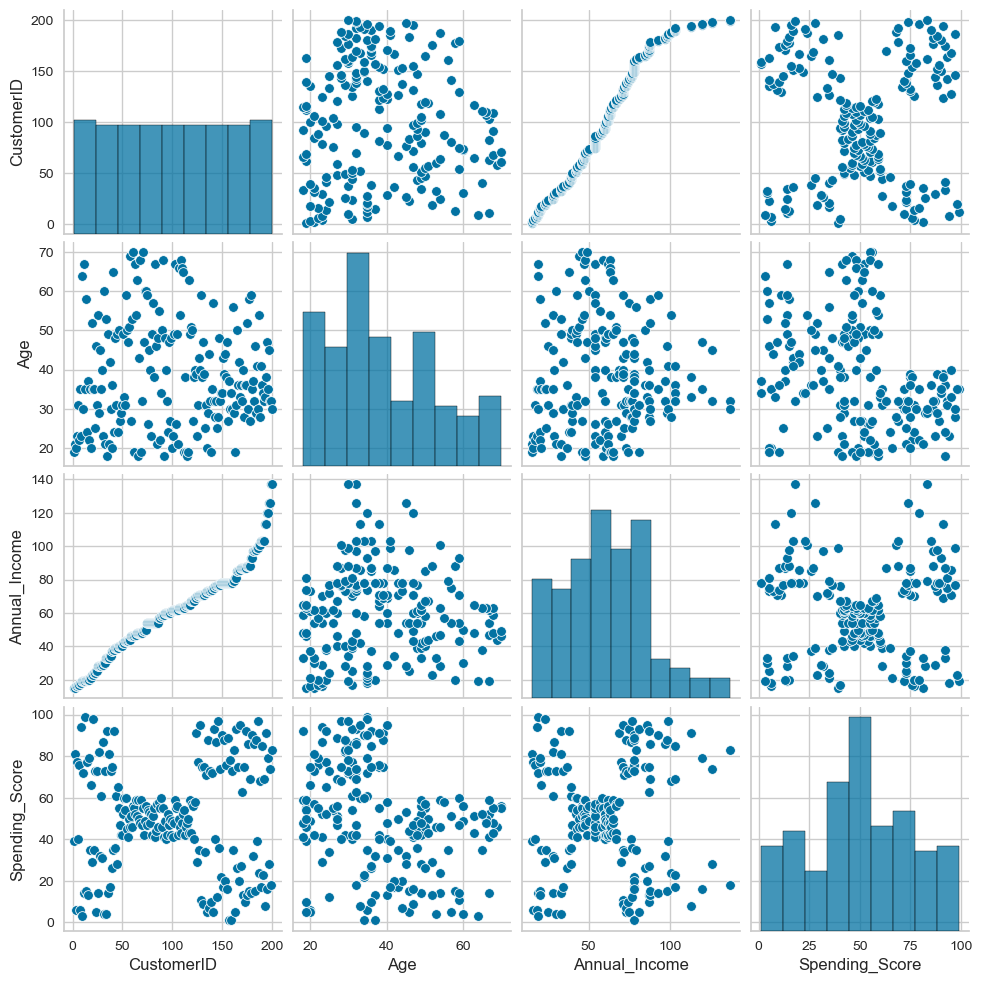

In [11]:
sns.pairplot(df)
plt.show()

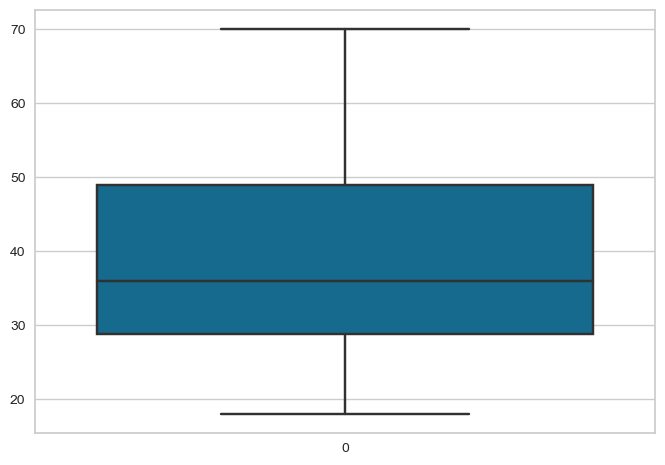

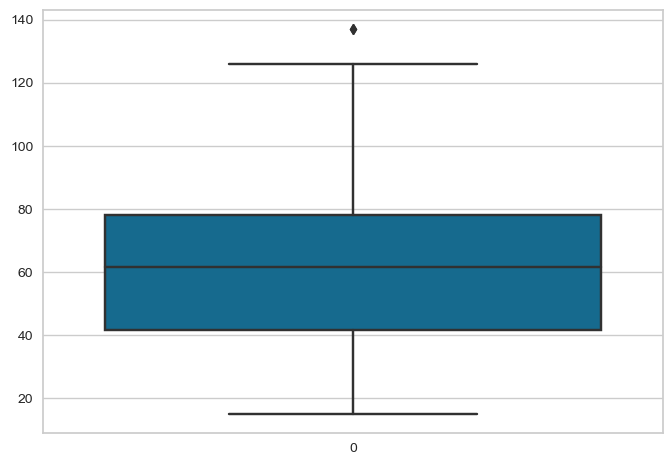

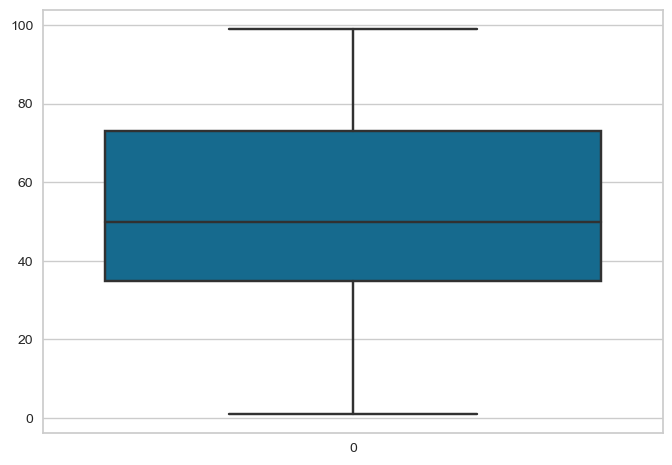

In [12]:
for i in df.drop("CustomerID",axis=1).select_dtypes("number"):
    plt.figure()
    sns.boxplot(data=df[i])
    plt.show()

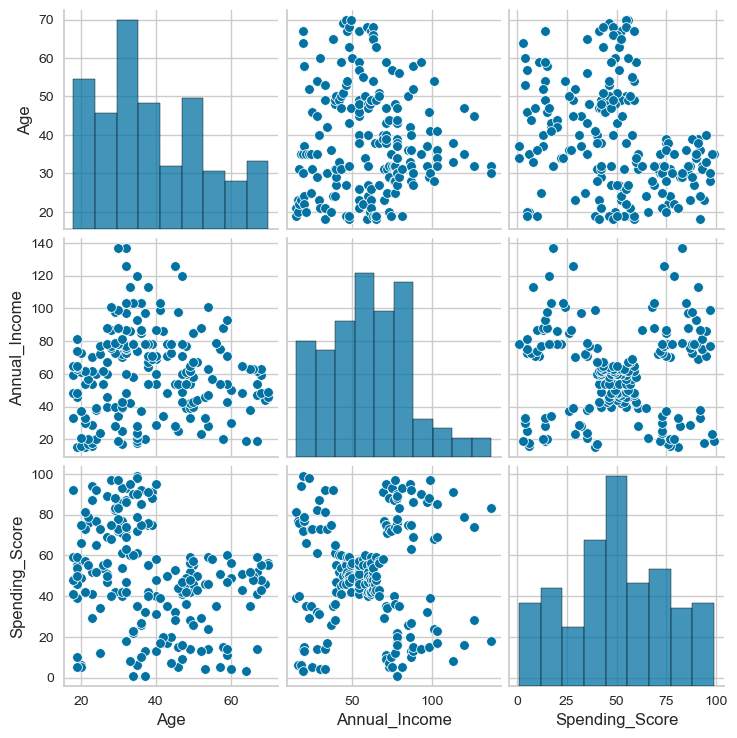

In [13]:
sns.pairplot(df.drop("CustomerID",axis=1))

<Axes: >

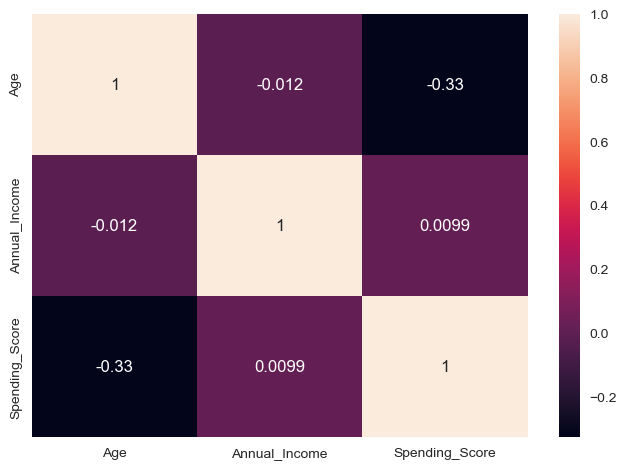

In [14]:
sns.heatmap(df.drop("CustomerID",axis=1).corr(),annot=True)

In [15]:
df.drop(columns= "CustomerID", inplace=True)

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [17]:
df_2 = df.drop(columns="Gender")
df_2

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


In [16]:
x_age_spending_score = df.loc[:,['Age','Spending_Score']]
x_age_spending_score

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
5,22,76
6,35,6
7,23,94
8,64,3
9,30,72


In [18]:
scaler=StandardScaler()
x_age_spending_score=scaler.fit_transform(x_age_spending_score)#x1=pd.DataFrame(scaler.fit_transform(x1), columns=['Age', 'Spending_Score'])

In [19]:
x_age_spending_score.shape

(200, 2)

In [20]:
hopkins(x_age_spending_score, 1)

0.6678104689222191

In [22]:
result = []                             #datamızın kümeleye uygun olduğunu gördük
for _ in range(10):
    result.append(hopkins(x_age_spending_score, 1))
np.mean(result)

0.6826624417731258

#### *ii. Determine optimal number of clusters*

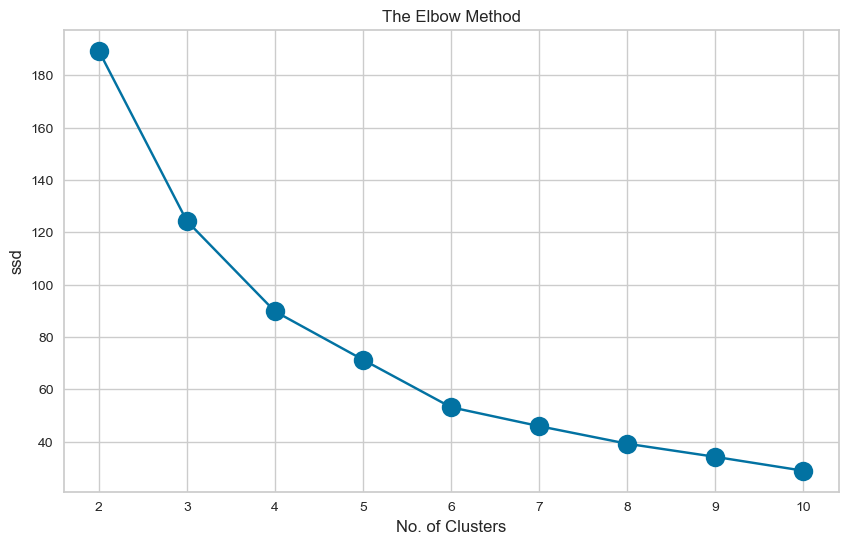

In [24]:
ssd = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(x_age_spending_score)
    ssd.append(kmeans.inertia_)          

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), ssd, "bo-",  markersize=14.0)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()                 #inertia kümedeki gözlemlerin merkeze uzaklığı/ne kadar küçükse o kdar iyi merkezde toplanıyor


In [25]:
ssd # sum of squared distance #hata değerleri mesafelerin karelerinin toplamı

[189.38749033992428,
 124.32628617921526,
 89.76521676586152,
 71.29556592219438,
 53.128438356294005,
 45.90710456567847,
 39.1851961213981,
 34.168841096196275,
 28.861661066694083]

In [26]:
-pd.Series(ssd).diff() #hartalar arasındaki fark

0          NaN
1    65.061204
2    34.561069
3    18.469651
4    18.167128
5     7.221334
6     6.721908
7     5.016355
8     5.307180
dtype: float64

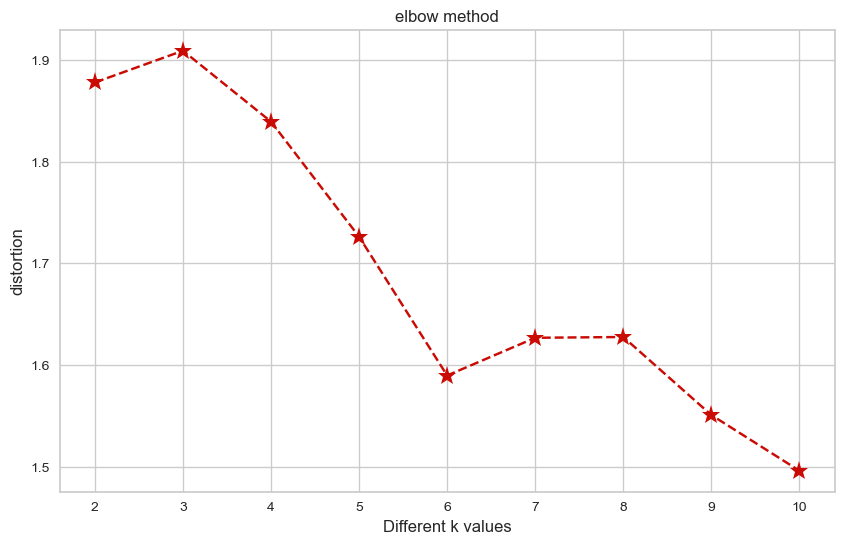

In [27]:
K = range(2, 11)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(x_age_spending_score)
    distances = kmeanModel.transform(x_age_spending_score) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # gözlemlerin kendi merkezlerine olan uzaklıkalrı
        result.append(np.mean(cluster_distances ** 2)) #her kümedeki her gözlemin kendi merkezlerine olan uzaklıkalrının karelerinin ortalaması
    distortion.append(sum(result)) # tüm kümelerin ortalamalarını toplayıp distorriona ekledik

plt.figure(figsize=(10,6))
plt.plot(K, distortion, "r*--", markersize=14.0)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")
plt.show()

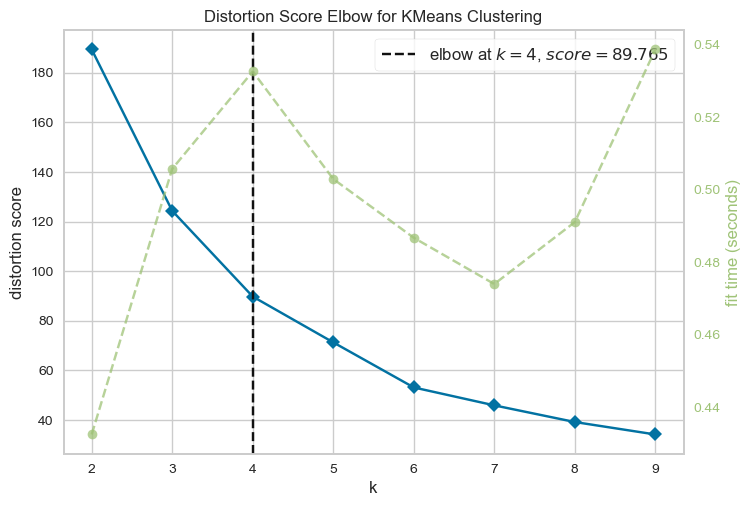

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
kmeans = KMeans(random_state=42)                  #When the model is fit with 4 clusters,
visu = KElbowVisualizer(kmeans, k = (2,10))       #we can see a line annotating the “elbow” in the graph, which in this case we know to be the optimal number.
visu.fit(x_age_spending_score)
visu.poof()     #distortion inertia değeri---yellowbrick                             #kesikli yeşil çizgi olarak görünür ancak ayarıyla gizlenebilir timings=False

https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
KElbowVisualizerVeri bilimcilerin, modeli bir dizi değerle eşleştirerek en uygun küme sayısını seçmelerine yardımcı olmak için "elbow" yöntemini uygular .
Çizgi grafiği bir kola benziyorsa, o zaman "elbow" (eğrinin bükülme noktası), temel modelin bu noktaya en iyi şekilde uyduğunun iyi bir göstergesidir. 

# Silhouette analysis

distorsiyon : merkezlere olan mesafelerin karelerinin toplamı

siluet : küme içi ve en yakın küme mesafesinin ortalama oranı

In [29]:
range_n_clusters = range(2,9)               
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)            
    kmeans.fit(x_age_spending_score)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x_age_spending_score, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4721271643062346
For n_clusters=3, the silhouette score is 0.43952990002101927
For n_clusters=4, the silhouette score is 0.4383860846531993
For n_clusters=5, the silhouette score is 0.44754858878462783
For n_clusters=6, the silhouette score is 0.4566283030197353
For n_clusters=7, the silhouette score is 0.4114882432090666
For n_clusters=8, the silhouette score is 0.4048295376259236


In [ ]:
#negatif çıkanlar birden faza kümede bulunabilir yani kendi clusterına değil de başka clustera yakın

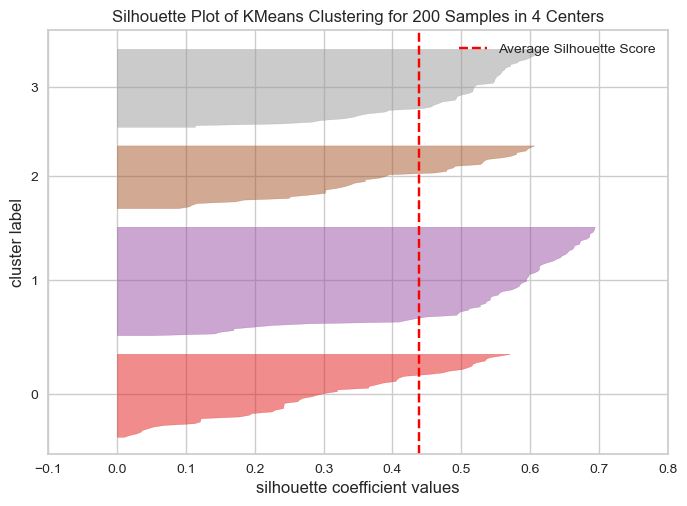

In [30]:
model4 = KMeans(n_clusters=4,
                random_state=42)          
visualizer4 = SilhouetteVisualizer(model4)

visualizer4.fit(x_age_spending_score)                                           #sol dikey genişilik her classdaki veri saysıı
visualizer4.poof();                                           #bıçakların ucu yumuşak indikçe daha iyi kümelendiğini gösteriyor                              

### Why silhouette_score is negative?

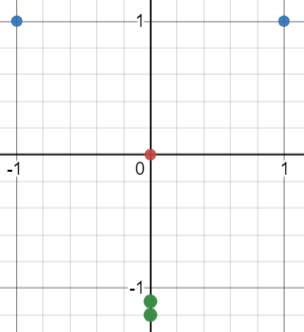

#### *iii. Apply K Means*

In [31]:
K_means_model = KMeans(n_clusters=4,random_state=42)
K_means_model.fit(x_age_spending_score)

KMeans(n_clusters=4, random_state=42)

In [32]:
K_means_model.fit_predict(x_age_spending_score)

array([0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 3, 1, 3, 1,
       2, 1, 3, 0, 0, 0, 3, 1, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       1, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1])

In [35]:
df_x_age_spending_score=pd.DataFrame(scaler.fit_transform(x_age_spending_score), columns=['Age', 'Spending_Score'])
df_x_age_spending_score

,Age,Spending_Score
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980
5,-1.209269,1.001596
6,-0.276302,-1.715913
7,-1.137502,1.700384
8,1.804932,-1.832378
9,-0.635135,0.846310


In [36]:
df_x_age_spending_score["cluster_Kmeans"] = K_means_model.fit_predict(x_age_spending_score) #kmeans.labels_

# Add cluster_Kmeans as a column to df_age_ss.

In [37]:
df_x_age_spending_score

,Age,Spending_Score,cluster_Kmeans
0,-1.424569,-0.434801,0
1,-1.281035,1.195704,1
2,-1.352802,-1.715913,0
3,-1.137502,1.040418,1
4,-0.563369,-0.395980,0
5,-1.209269,1.001596,1
6,-0.276302,-1.715913,2
7,-1.137502,1.700384,1
8,1.804932,-1.832378,2
9,-0.635135,0.846310,1


#### *iv. Visualizing and Labeling All the Clusters*

<Axes: xlabel='Age', ylabel='Spending_Score'>

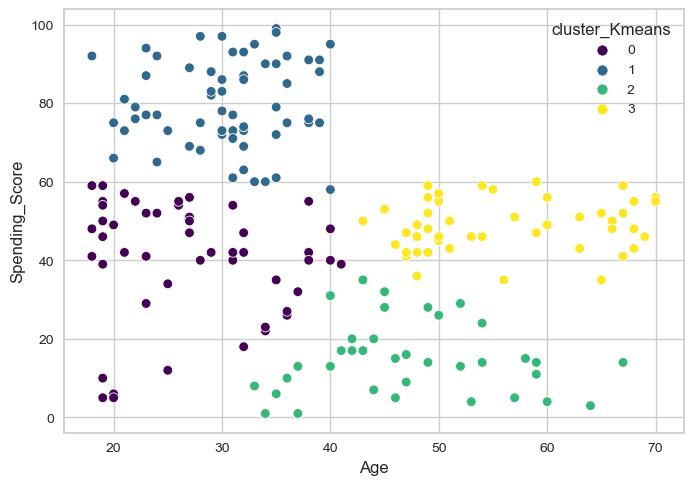

In [38]:
sns.scatterplot(x=df["Age"],
                y=df["Spending_Score"],
                hue=df_x_age_spending_score.cluster_Kmeans,
                palette="viridis")

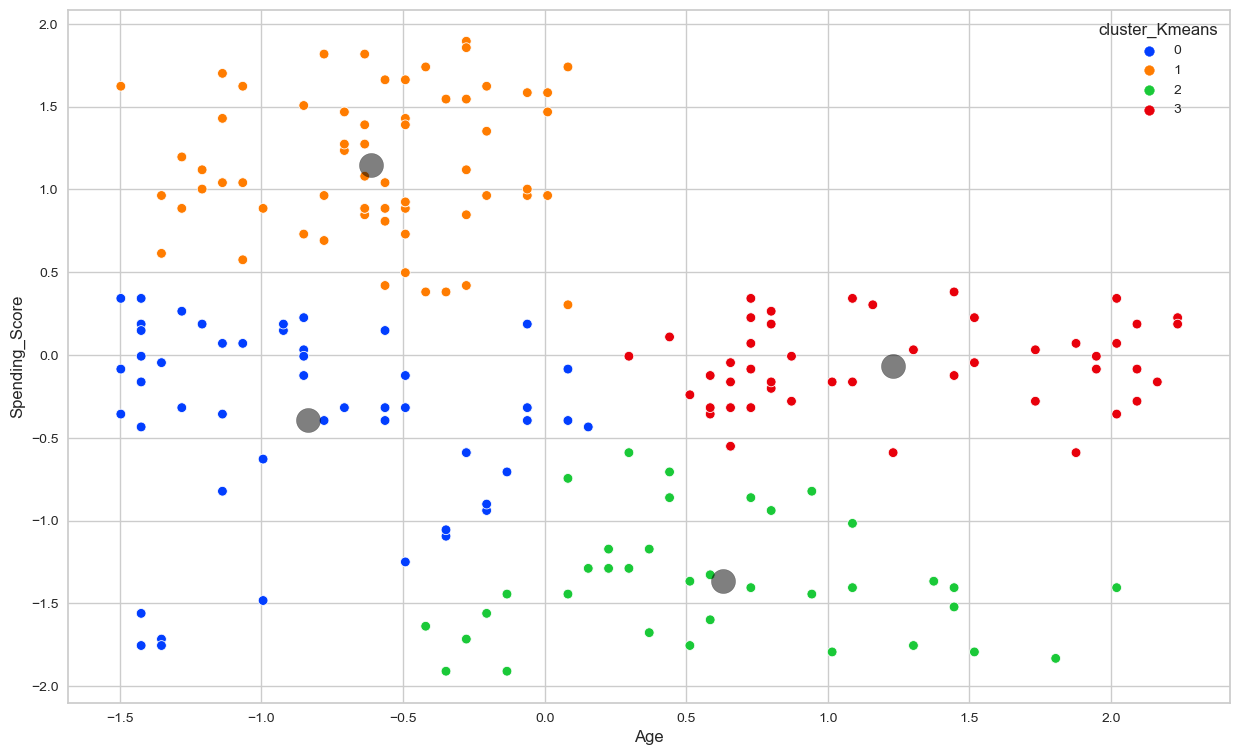

In [39]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Kmeans', data=df_x_age_spending_score, palette="bright")
centers = K_means_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1] , c='black', s=300, alpha=0.5)

<Axes: xlabel='cluster_Kmeans', ylabel='Age'>

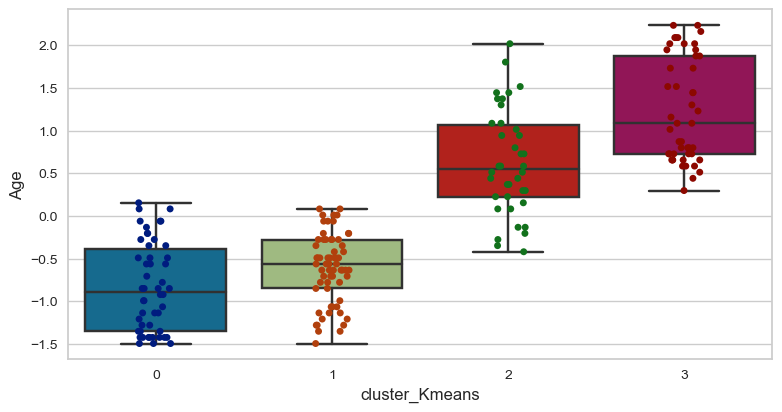

In [40]:
plt.figure(figsize=(20,10))

plt.subplot(221)
sns.boxplot(y="Age" , x="cluster_Kmeans" , data=df_x_age_spending_score)
sns.stripplot(y="Age" , x="cluster_Kmeans" , data=df_x_age_spending_score , palette="dark") 

<Axes: xlabel='cluster_Kmeans', ylabel='Spending_Score'>

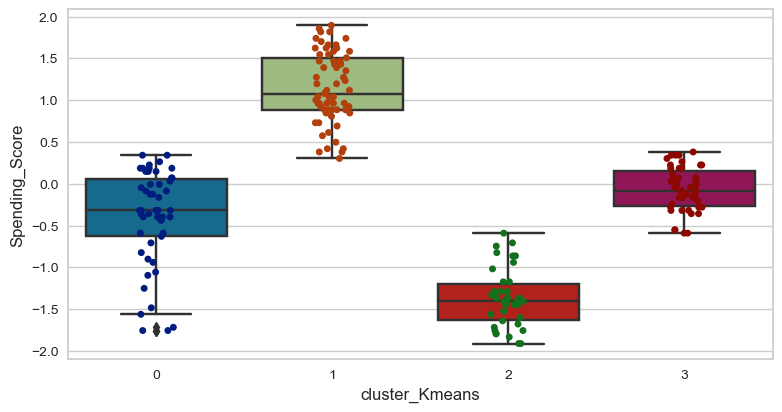

In [41]:
plt.figure(figsize=(20,10))

plt.subplot(221)
sns.boxplot(y="Spending_Score" , x="cluster_Kmeans" , data=df_x_age_spending_score)
sns.stripplot(y="Spending_Score" , x="cluster_Kmeans" , data=df_x_age_spending_score , palette="dark") 

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [43]:
X_annualincome_spendingscore = df[['Annual_Income','Spending_Score']]
X_annualincome_spendingscore.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [44]:
scaler=StandardScaler()
X_annualincome_spendingscore=scaler.fit_transform(X_annualincome_spendingscore)

In [45]:
X_annualincome_spendingscore.shape

(200, 2)

In [46]:
hopkins(X_annualincome_spendingscore, 1)

0.6800347799681069

In [47]:
result = []
for _ in range(5):
    result.append(hopkins(X_annualincome_spendingscore, 1))
np.mean(result)

0.7045024473205872

#### *ii. Determine optimal number of clusters*

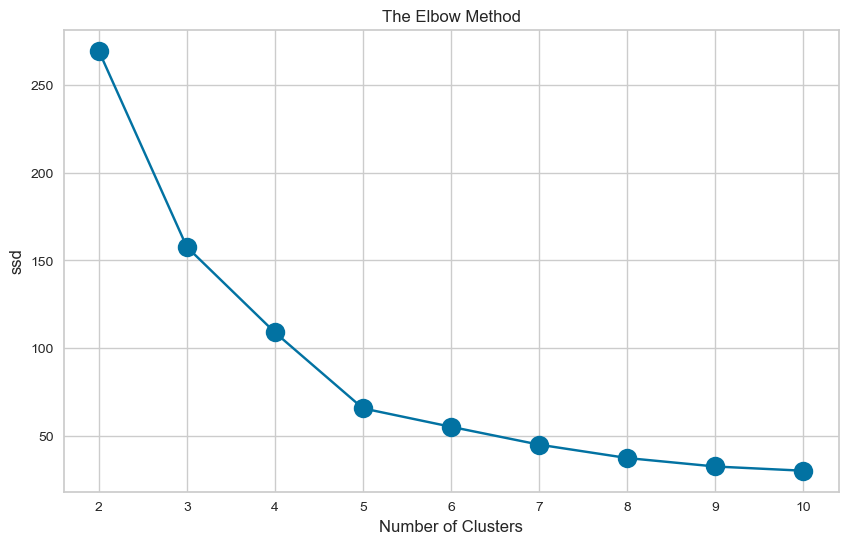

In [48]:
ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_annualincome_spendingscore)
    ssd.append(kmeans.inertia_) # distances from each observation to each cluster centroid
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-", markersize=14.0)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ssd')
plt.show()

In [49]:
ssd

[269.69101219276394,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270386,
 44.86475569922557,
 37.228187677585886,
 32.392267630331176,
 29.981897788243693]

In [50]:
-pd.Series(ssd).diff() 

0           NaN
1    111.987004
2     48.782692
3     43.352908
4     10.511060
5     10.192593
6      7.636568
7      4.835920
8      2.410370
dtype: float64

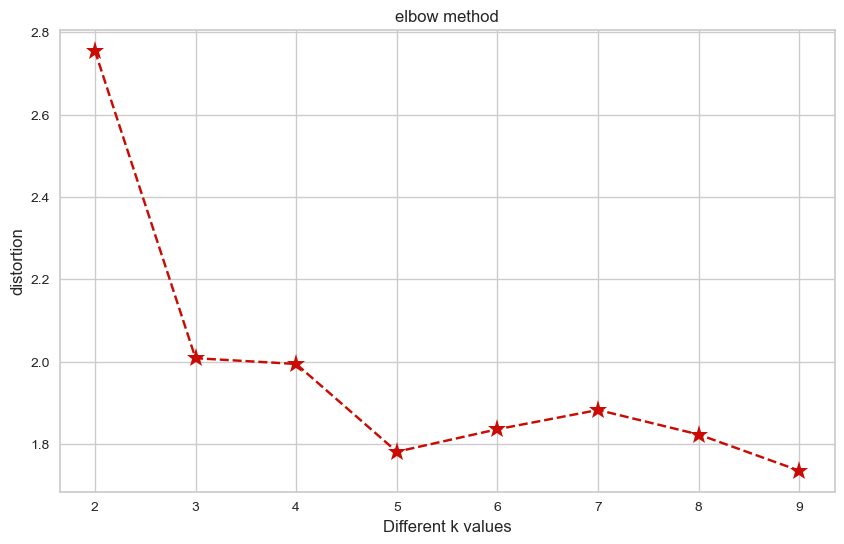

In [52]:
K = range(2, 10)
distortion = []  #distortion her bir gözlemin centroidne uzaklığının karesi/mean
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X_annualincome_spendingscore)
    distances = kmeanModel.transform(X_annualincome_spendingscore) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

plt.figure(figsize=(10,6))
plt.plot(K, distortion, "r*--", markersize=14.0)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")
plt.show()

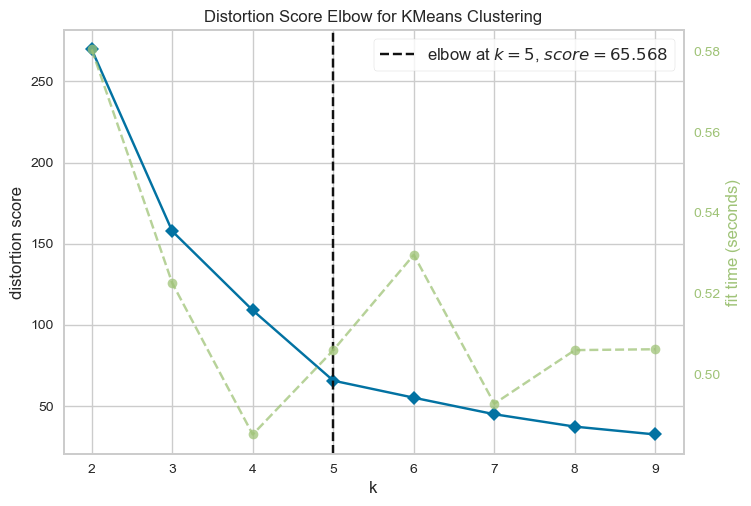

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
kmeans = KMeans(random_state=42)                 
visu = KElbowVisualizer(kmeans, k = (2,10))        
visu.fit(X_annualincome_spendingscore)
visu.poof()                                       

In [54]:
range_n_clusters = range(2,9)               
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)            
    kmeans.fit(X_annualincome_spendingscore)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_annualincome_spendingscore, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3212707813918878
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5398800926790663
For n_clusters=7, the silhouette score is 0.5281492781108291
For n_clusters=8, the silhouette score is 0.4552147906587443


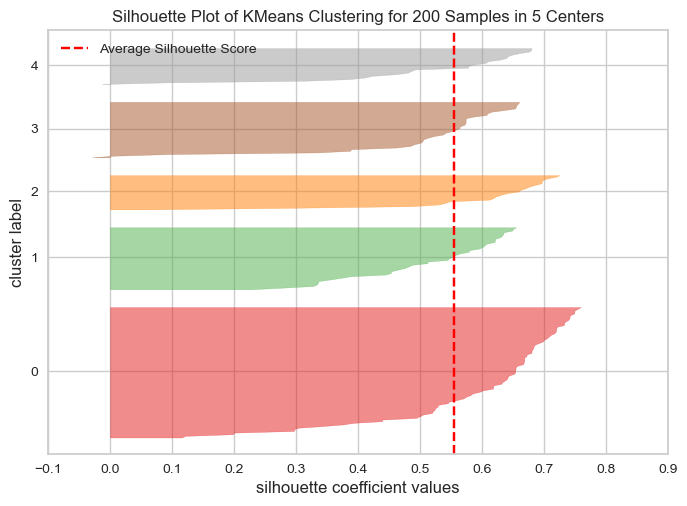

In [55]:
model5 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model5)

visualizer.fit(X_annualincome_spendingscore)   
visualizer.poof();

#### *iii. Apply K Means*

In [59]:
K_means_model2 = KMeans(n_clusters=5,random_state=42)
K_means_model2.fit(X_annualincome_spendingscore)

KMeans(n_clusters=5, random_state=42)

In [60]:
K_means_model2.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [61]:
df_X_annualincome_spendingscore=pd.DataFrame(scaler.fit_transform(X_annualincome_spendingscore), columns=['Annual_Income', 'Spending_Score'])
df_X_annualincome_spendingscore

,Annual_Income,Spending_Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
5,-1.662660,1.001596
6,-1.624491,-1.715913
7,-1.624491,1.700384
8,-1.586321,-1.832378
9,-1.586321,0.846310


In [63]:
df_X_annualincome_spendingscore['cluster_Kmeans'] = K_means_model2.labels_
df_X_annualincome_spendingscore

,Annual_Income,Spending_Score,Cluster2,cluster_Kmeans
0,-1.738999,-0.434801,4,4
1,-1.738999,1.195704,2,2
2,-1.700830,-1.715913,4,4
3,-1.700830,1.040418,2,2
4,-1.662660,-0.395980,4,4
5,-1.662660,1.001596,2,2
6,-1.624491,-1.715913,4,4
7,-1.624491,1.700384,2,2
8,-1.586321,-1.832378,4,4
9,-1.586321,0.846310,2,2


#### *iv. Visualizing and Labeling All the Clusters*

<Figure size 2000x1000 with 0 Axes>

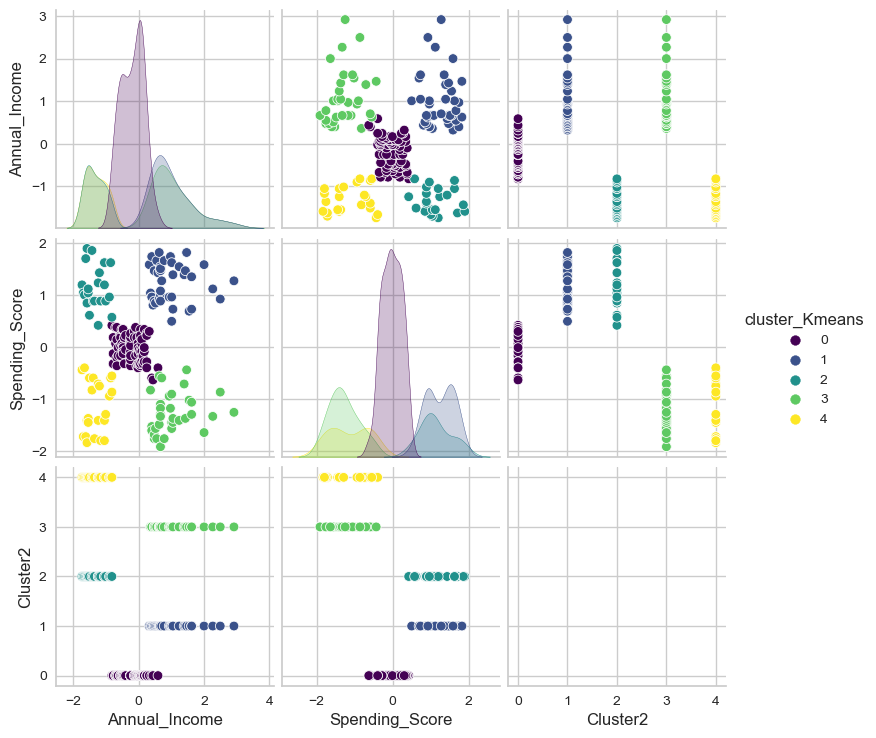

In [64]:
plt.figure(figsize=(20,10))
sns.pairplot(data=df_X_annualincome_spendingscore , hue="cluster_Kmeans" , palette="viridis")

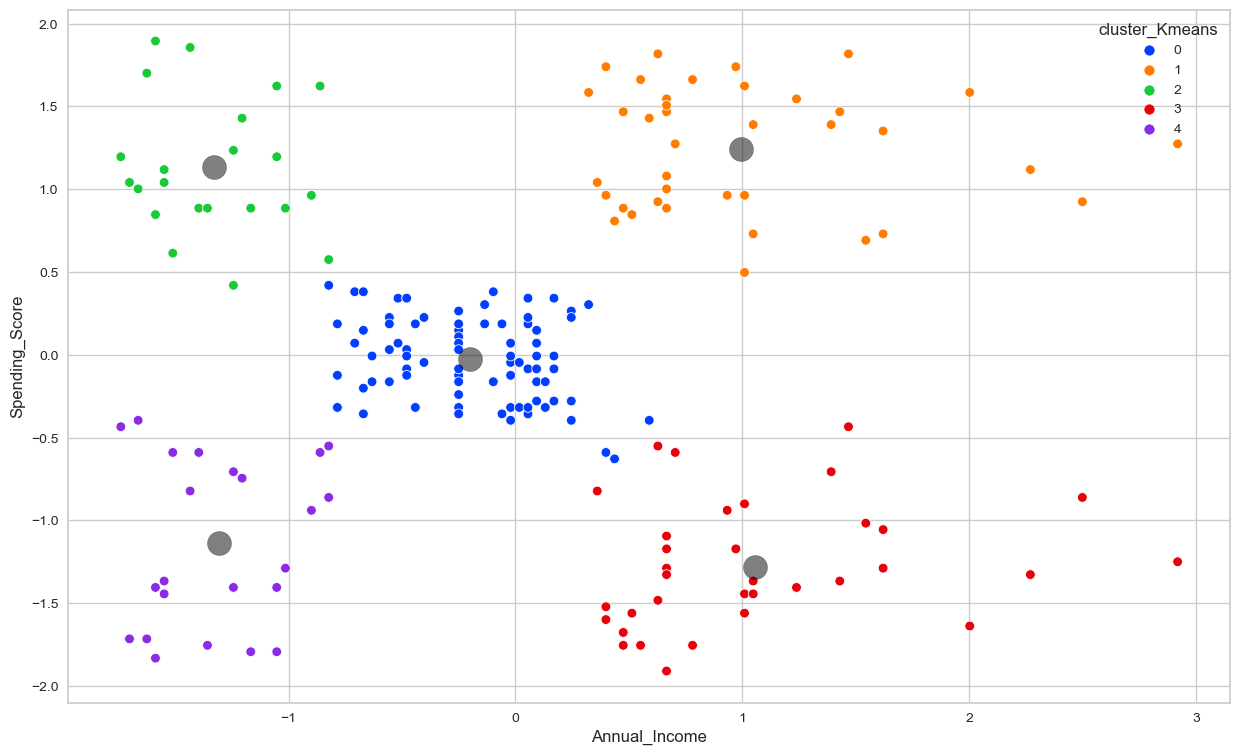

In [65]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Kmeans', data=df_X_annualincome_spendingscore, palette="bright")
centers = K_means_model2.cluster_centers_
plt.scatter(x=centers[:, 0], y=centers[:, 1], c='black', s=300, alpha=0.5)
plt.show()

<Axes: xlabel='cluster_Kmeans', ylabel='Annual_Income'>

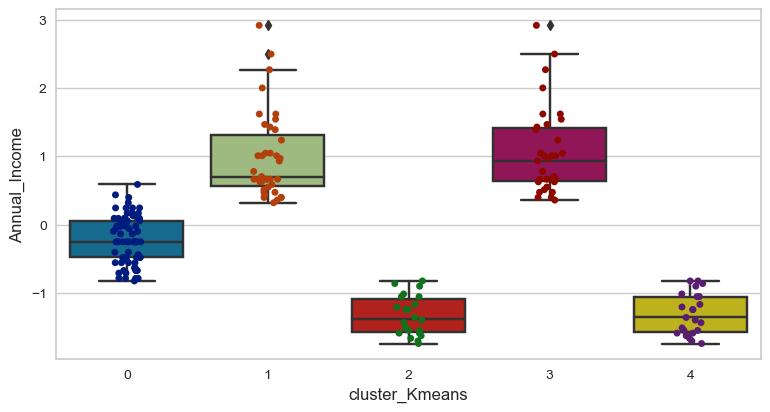

In [66]:
plt.figure(figsize=(20,10))

plt.subplot(221)
sns.boxplot(y="Annual_Income" , x="cluster_Kmeans" , data=df_X_annualincome_spendingscore)
sns.stripplot(y="Annual_Income" , x="cluster_Kmeans" , data=df_X_annualincome_spendingscore , palette="dark") 

<Axes: xlabel='cluster_Kmeans', ylabel='Spending_Score'>

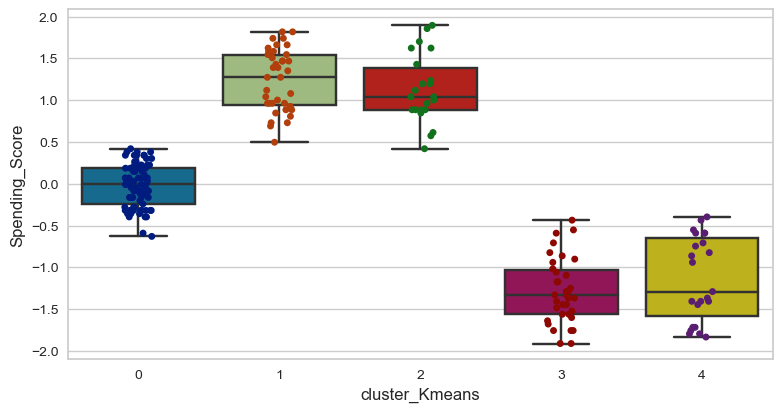

In [67]:
plt.figure(figsize=(20,10))

plt.subplot(221)
sns.boxplot(y="Spending_Score" , x="cluster_Kmeans" , data=df_X_annualincome_spendingscore)
sns.stripplot(y="Spending_Score" , x="cluster_Kmeans" , data=df_X_annualincome_spendingscore , palette="dark") 

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [72]:
hc_ward = linkage(y = x_age_spending_score, method = "ward")
hc_complete = linkage(x_age_spending_score, "complete")
hc_average = linkage(x_age_spending_score, "average")
hc_single = linkage(x_age_spending_score, "single")

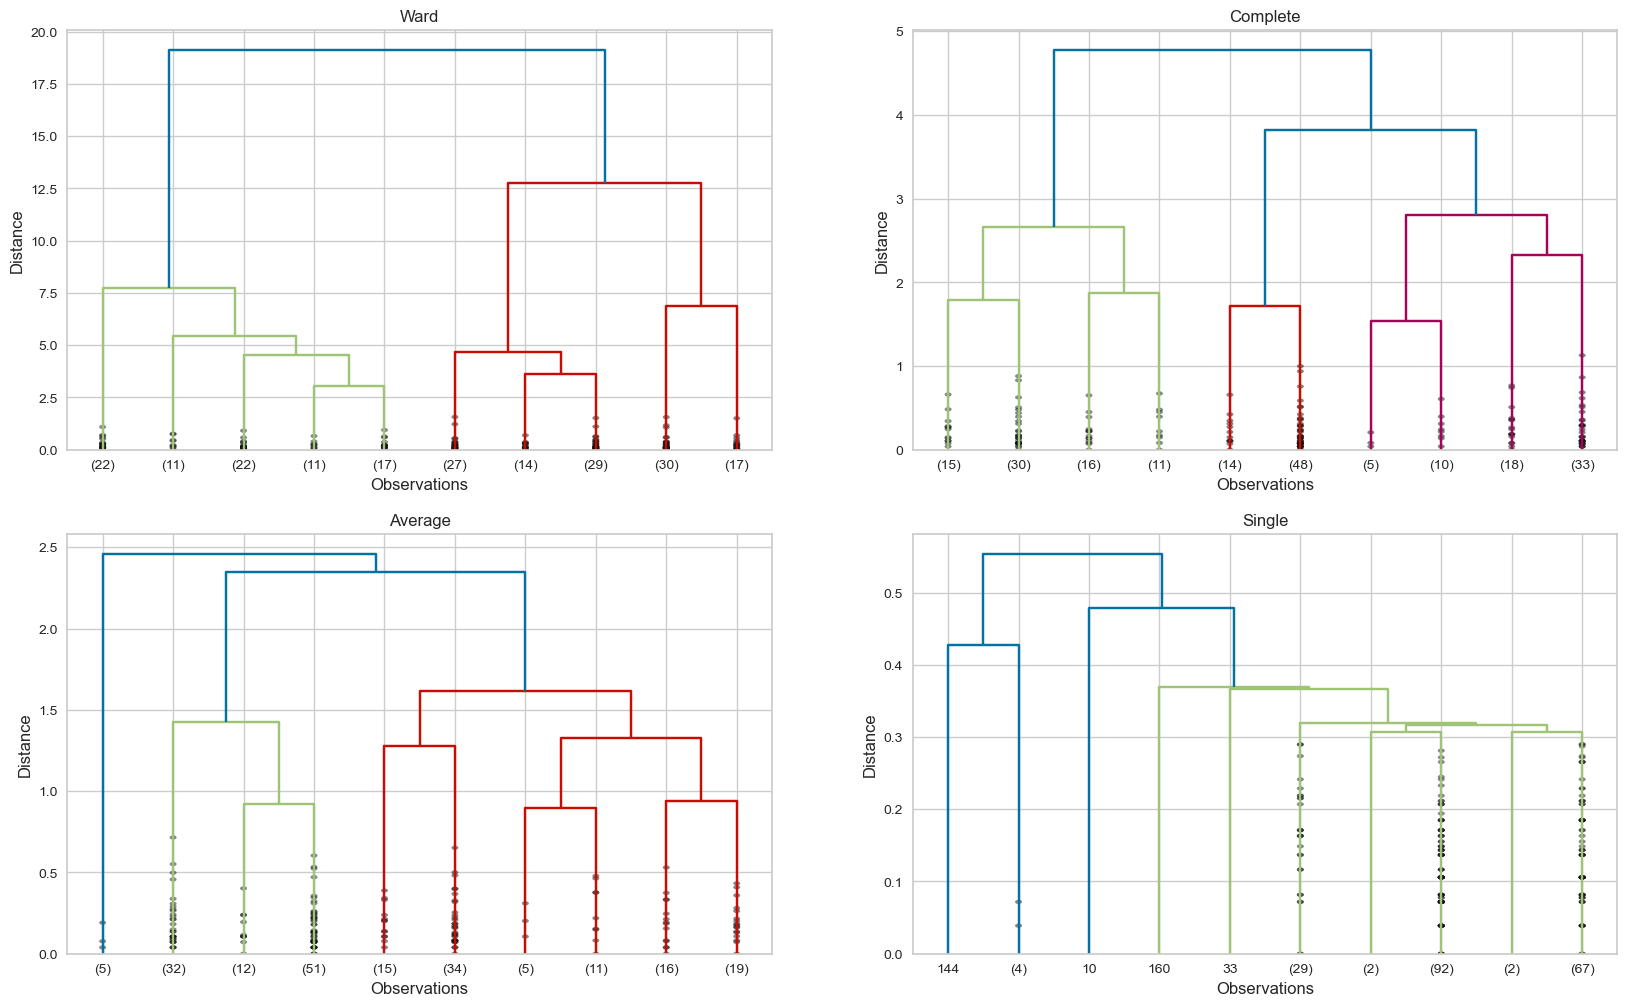

In [73]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [74]:
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(x_age_spending_score)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x_age_spending_score, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.41449964268735984
For n_clusters=3, the silhouette score is 0.41664148520394606
For n_clusters=4, the silhouette score is 0.3892700489345869
For n_clusters=5, the silhouette score is 0.3764554127950157
For n_clusters=6, the silhouette score is 0.3990690566534328
For n_clusters=7, the silhouette score is 0.3586046783668453
For n_clusters=8, the silhouette score is 0.3610812833213386
For n_clusters=9, the silhouette score is 0.365908374973662
For n_clusters=10, the silhouette score is 0.3688228754847425


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [80]:
Agg1 = AgglomerativeClustering(
    n_clusters=4,
    metric=
    'euclidean',  # If linkage = "ward" then metric='euclidean' is required.
    linkage='ward')  # originating from the formulation of variance...
y_agg = Agg1.fit_predict(x_age_spending_score)

In [81]:
df_x_age_spending_score

,Age,Spending_Score,cluster_Kmeans
0,-1.424569,-0.434801,0
1,-1.281035,1.195704,1
2,-1.352802,-1.715913,0
3,-1.137502,1.040418,1
4,-0.563369,-0.395980,0
5,-1.209269,1.001596,1
6,-0.276302,-1.715913,2
7,-1.137502,1.700384,1
8,1.804932,-1.832378,2
9,-0.635135,0.846310,1


In [82]:
df_x_age_spending_score['cluster_Agg'] = y_agg
df_x_age_spending_score.head()

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,-1.424569,-0.434801,0,0
1,-1.281035,1.195704,1,2
2,-1.352802,-1.715913,0,0
3,-1.137502,1.040418,1,2
4,-0.563369,-0.395980,0,0


## Clustering based on Annual Income and Spending Score- x2

#### Annual Income and Spending Score- x2

In [75]:
hc_ward = linkage(y = X_annualincome_spendingscore, method = "ward")
hc_complete = linkage(X_annualincome_spendingscore, "complete")
hc_average = linkage(X_annualincome_spendingscore, "average")
hc_single = linkage(X_annualincome_spendingscore, "single")

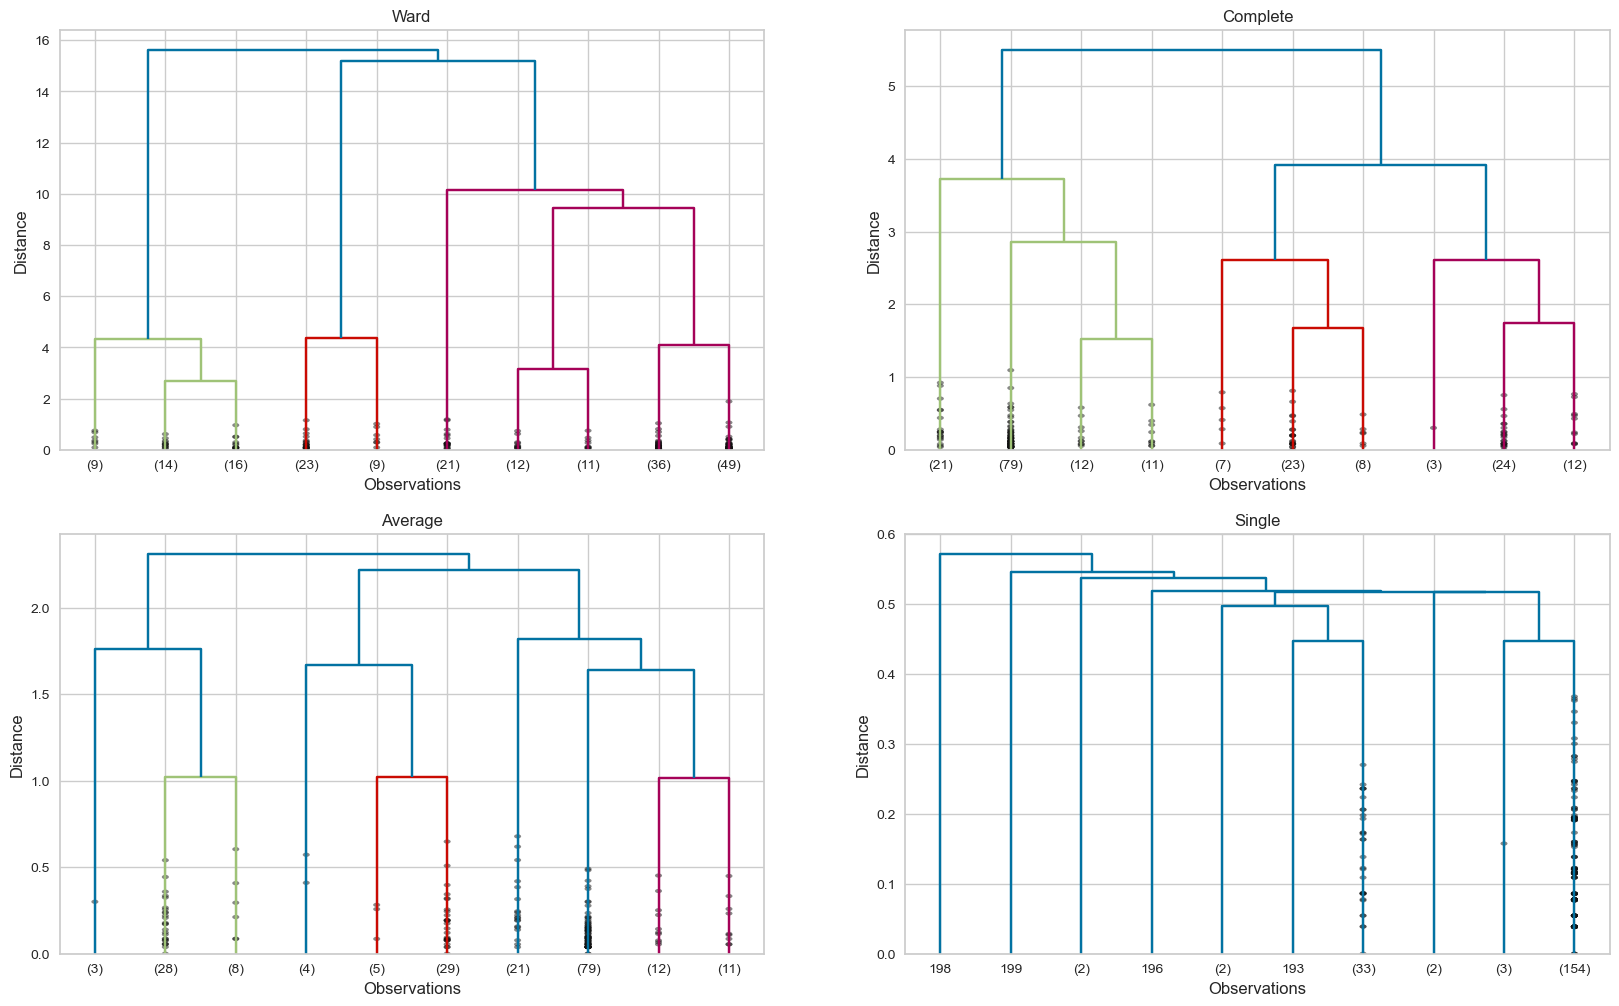

In [76]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [77]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_annualincome_spendingscore)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_annualincome_spendingscore, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3842337621772661
For n_clusters=3, the silhouette score is 0.4610481446570447
For n_clusters=4, the silhouette score is 0.4925507715349343
For n_clusters=5, the silhouette score is 0.5538089226688662
For n_clusters=6, the silhouette score is 0.5386761871036926
For n_clusters=7, the silhouette score is 0.5197949293475768
For n_clusters=8, the silhouette score is 0.4308617778221774
For n_clusters=9, the silhouette score is 0.43768997758154127
For n_clusters=10, the silhouette score is 0.4339007174968657


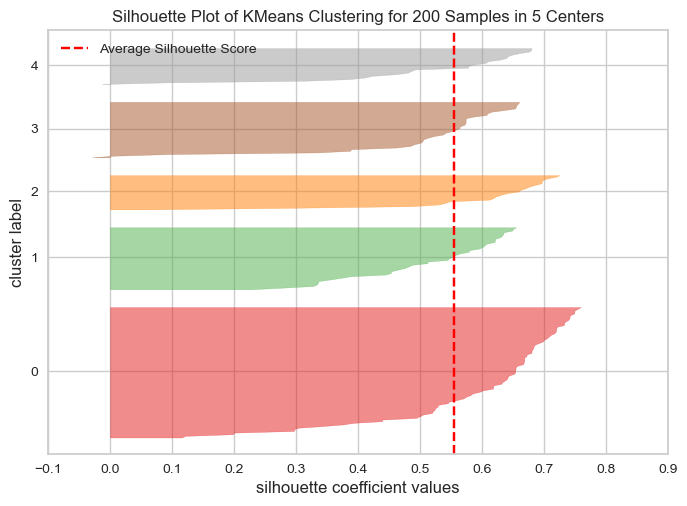

In [78]:
model5 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model5)

visualizer.fit(X_annualincome_spendingscore)   
visualizer.poof();

### ii. *Apply Agglomerative Clustering*

#### Annual Income and Spending Score- x2

In [83]:
Agg2 = AgglomerativeClustering(n_clusters=5,
                               metric='euclidean',
                               linkage='ward')
y_agg2 = Agg2.fit_predict(X_annualincome_spendingscore)

In [84]:
df_X_annualincome_spendingscore

,Annual_Income,Spending_Score,Cluster2,cluster_Kmeans
0,-1.738999,-0.434801,4,4
1,-1.738999,1.195704,2,2
2,-1.700830,-1.715913,4,4
3,-1.700830,1.040418,2,2
4,-1.662660,-0.395980,4,4
5,-1.662660,1.001596,2,2
6,-1.624491,-1.715913,4,4
7,-1.624491,1.700384,2,2
8,-1.586321,-1.832378,4,4
9,-1.586321,0.846310,2,2


In [85]:
df_X_annualincome_spendingscore['cluster_Agg'] = y_agg2
df_X_annualincome_spendingscore.head()

,Annual_Income,Spending_Score,Cluster2,cluster_Kmeans,cluster_Agg
0,-1.738999,-0.434801,4,4,4
1,-1.738999,1.195704,2,2,3
2,-1.700830,-1.715913,4,4,4
3,-1.700830,1.040418,2,2,3
4,-1.662660,-0.395980,4,4,4


In [86]:
# labels are different but their locations are almost the same (cluster_Kmeans - cluster_Agg)

### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

<Axes: xlabel='Age', ylabel='Spending_Score'>

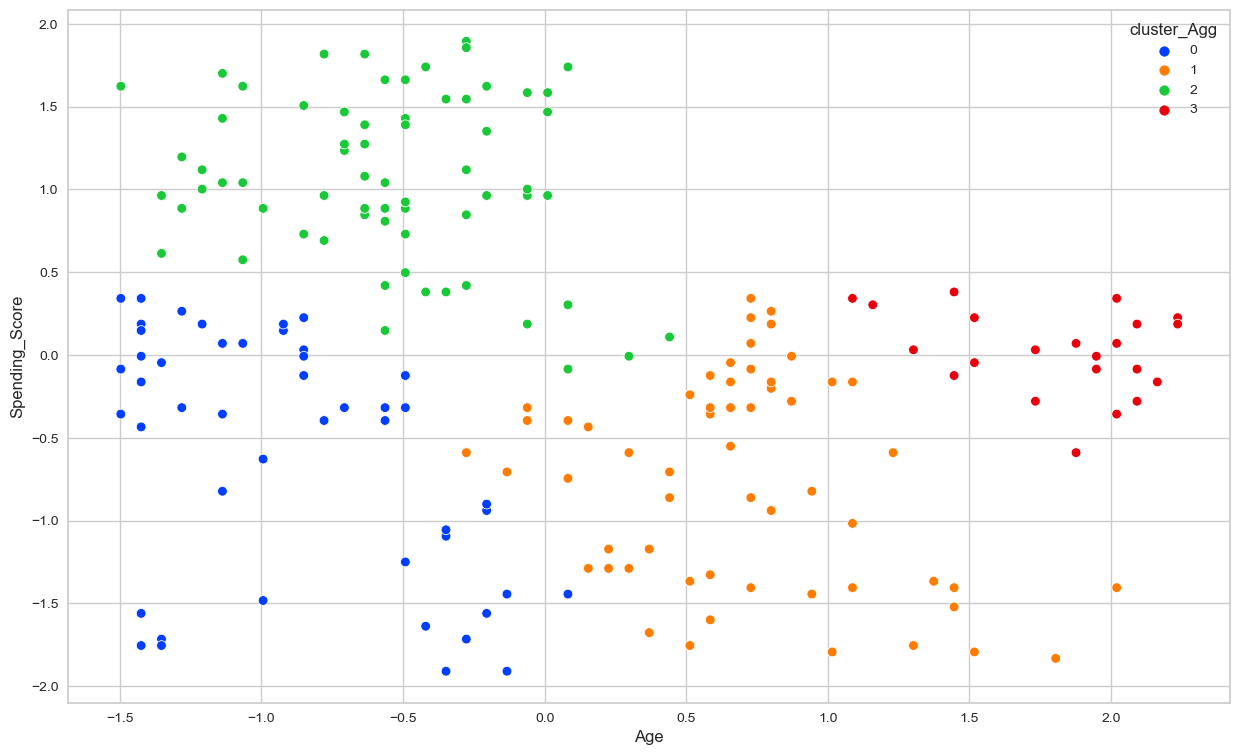

In [89]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Agg', data=df_x_age_spending_score, palette="bright")

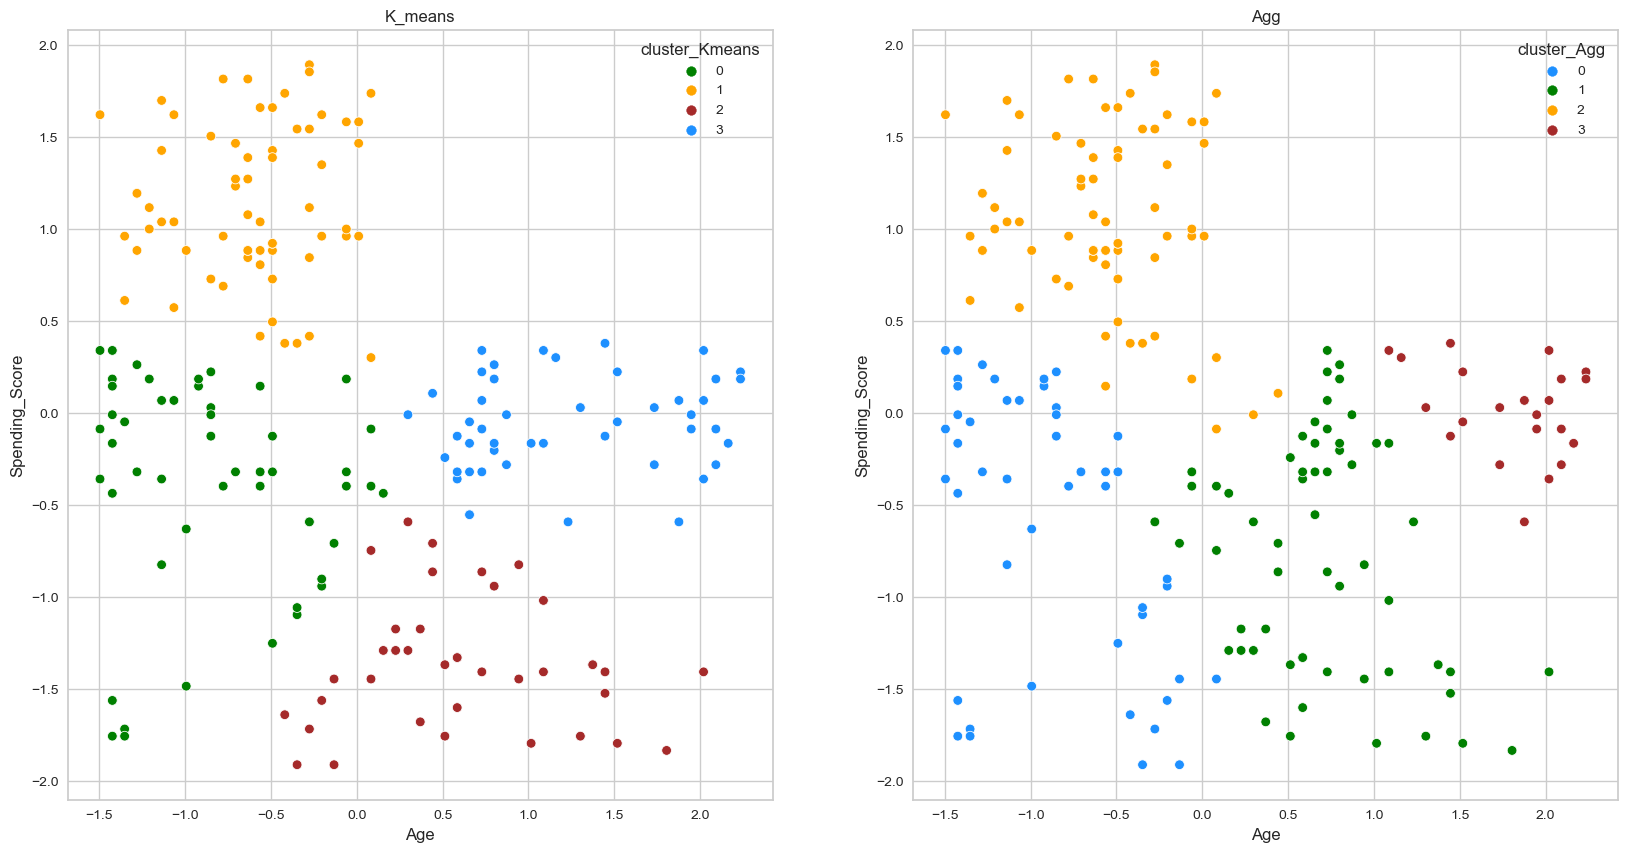

In [90]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=df_x_age_spending_score,
                palette=['green', 'orange', 'brown', 'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_x_age_spending_score,
                palette=['dodgerblue', 'green', 'orange', 'brown'])
plt.title("Agg");

#### Annual Income and Spending Score- x2

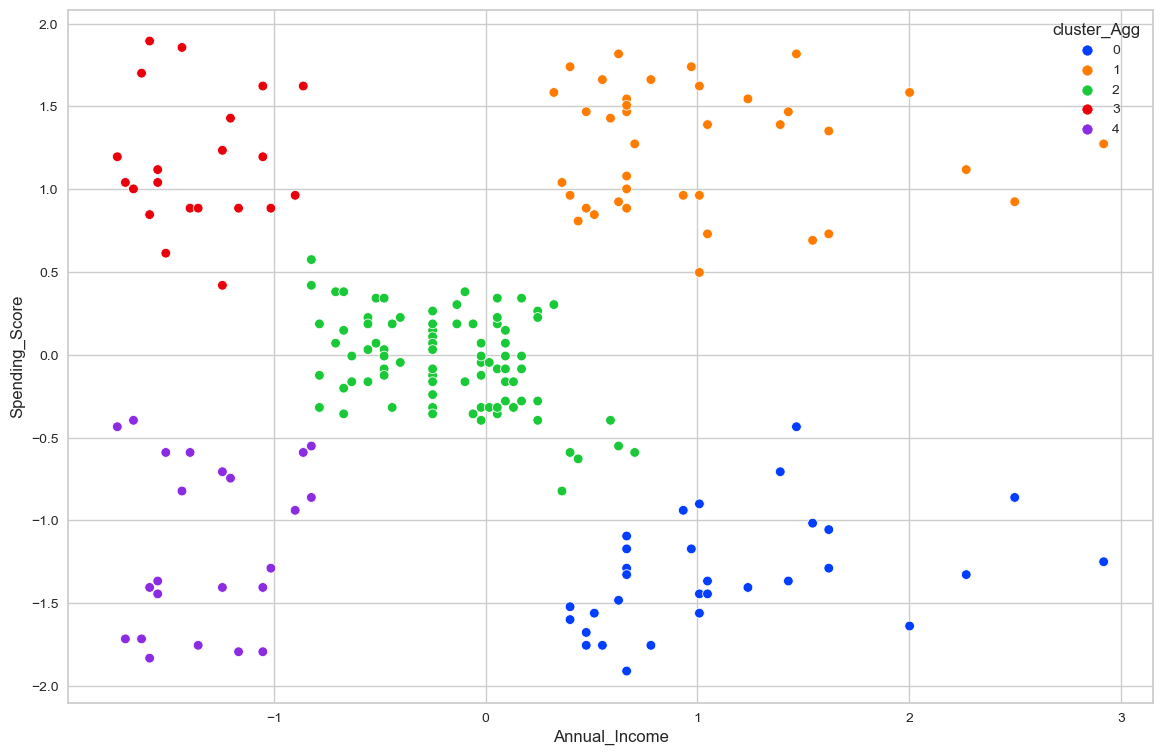

In [91]:
plt.figure(figsize=(14,9))
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_X_annualincome_spendingscore,
                palette="bright")
plt.show()

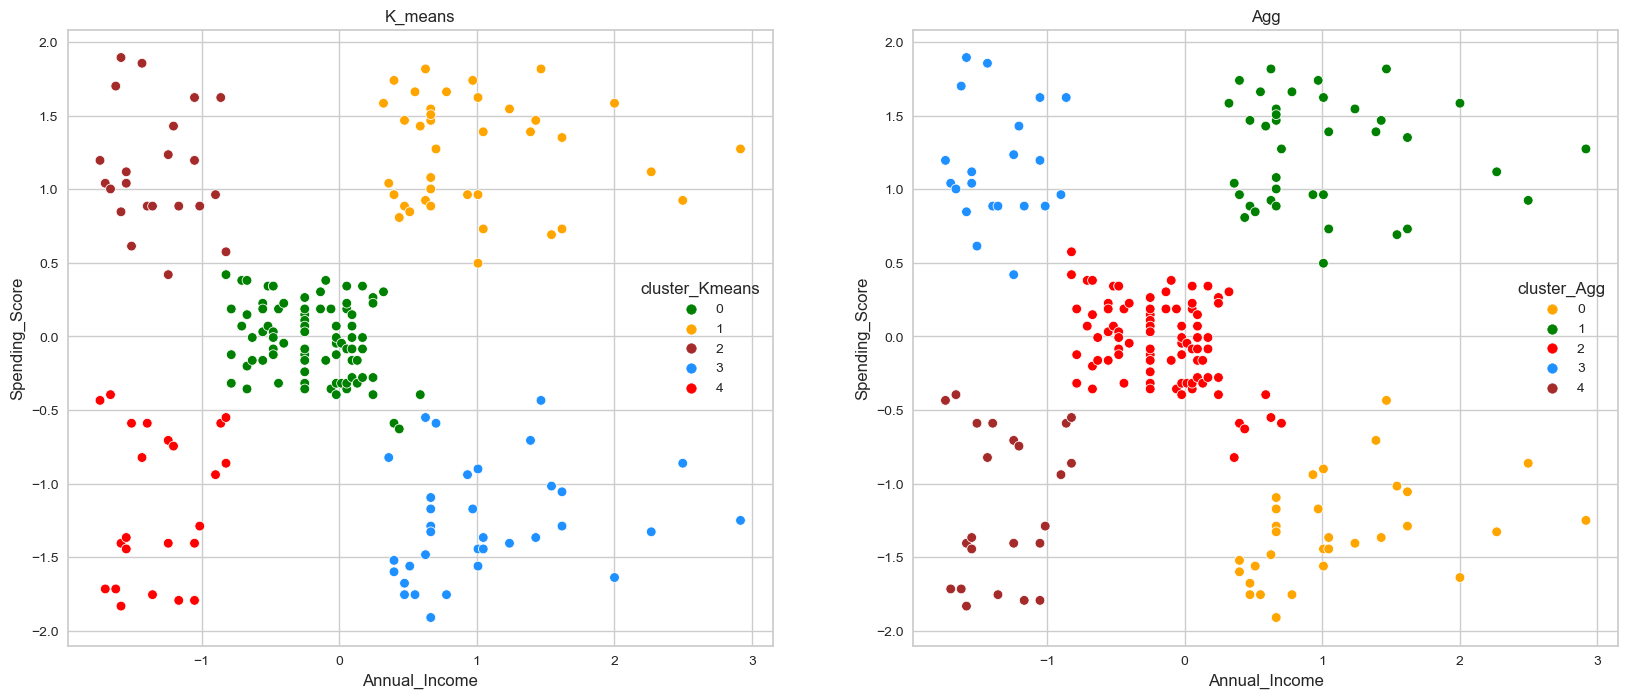

In [92]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=df_X_annualincome_spendingscore,
                palette=['green', 'orange', 'brown', 'dodgerblue', 'red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_X_annualincome_spendingscore,
                palette=['orange', 'green', 'red', 'dodgerblue', 'brown'])
plt.title("Agg")
plt.show()

In [ ]:
# There are healthier transitions in Kmeans
# We choose the Kmeans algorithm finally

#### Interpretation based on Age and Spending Score- x1

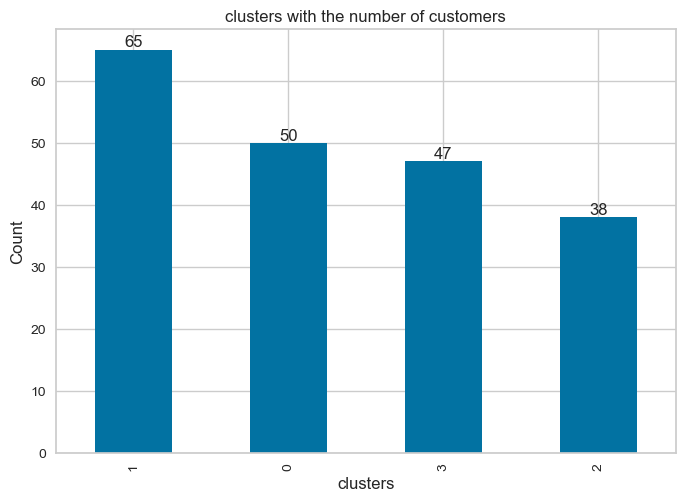

In [96]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_x_age_spending_score.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()        

In [98]:
df["cluster_Age_Spending_Score"] =  df_x_age_spending_score.cluster_Kmeans
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,0
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,1
4,Female,31,17,40,0


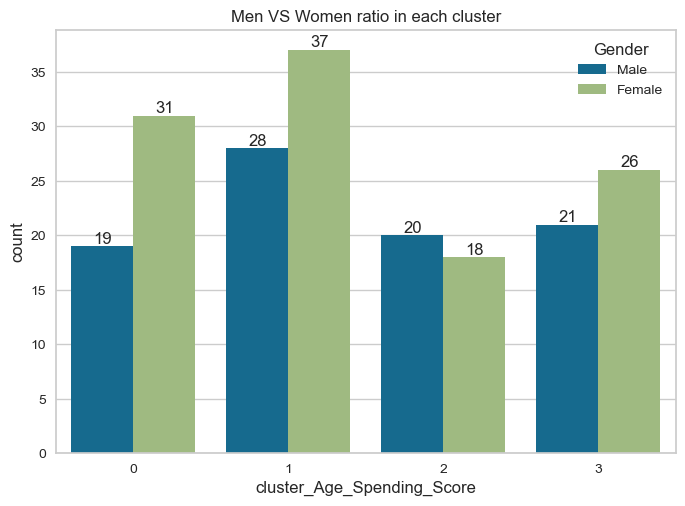

In [99]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)
plt.show()
# We count clusters according to gender.

In [100]:
df.groupby("cluster_Age_Spending_Score").mean()
# We group them according to the clusters formed.

,Age,Annual_Income,Spending_Score
cluster_Age_Spending_Score,,,
0,27.220000,59.620000,40.040000
1,30.292308,63.830769,79.815385
2,47.605263,63.789474,15.000000
3,55.978723,54.425532,48.510638


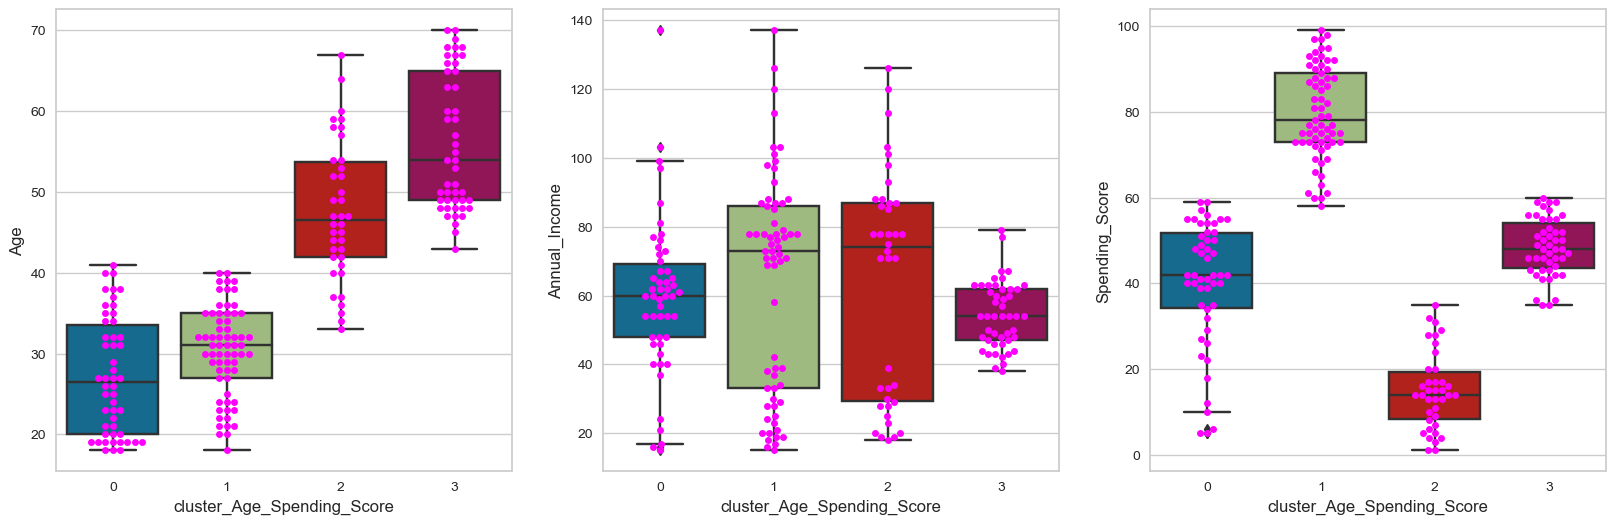

In [103]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Age",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

plt.subplot(132)
sns.boxplot(y="Annual_Income", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Annual_Income",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

plt.subplot(133)
sns.boxplot(y="Spending_Score", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Spending_Score",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")
plt.show()

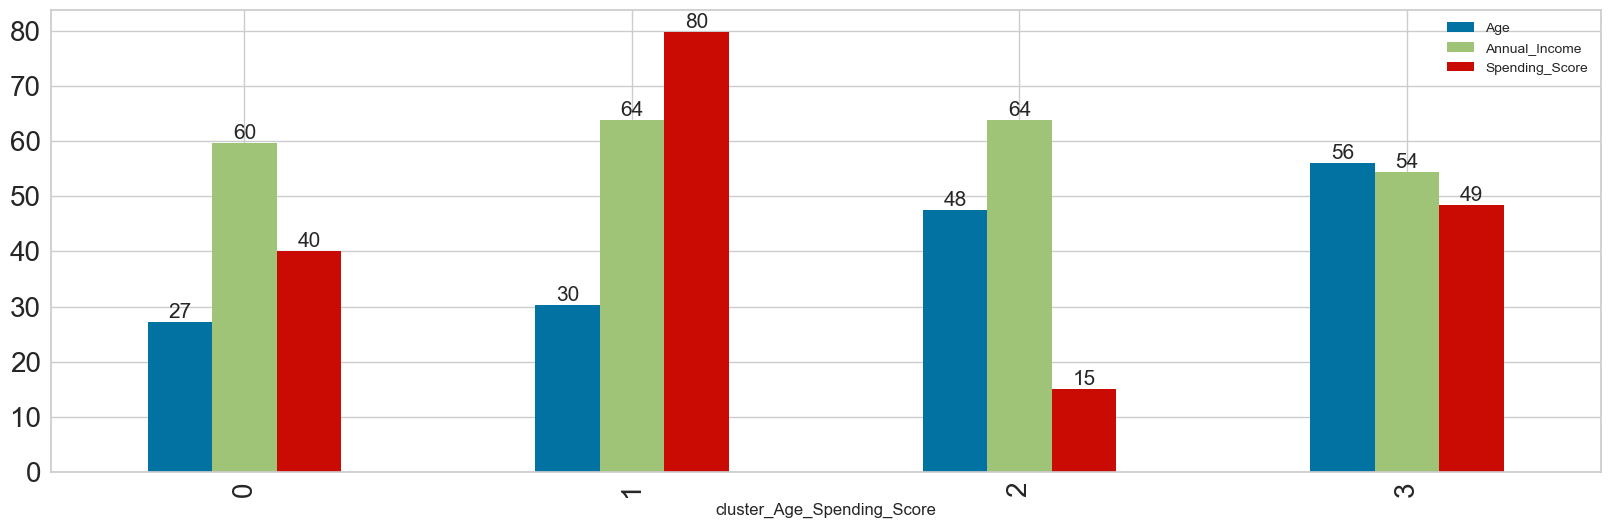

In [104]:
ax = df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar',
                                                          figsize=(20, 6),
                                                          fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=15)

# Note that we are using df.groupby("cluster_Age_Spending_Score").mean().

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [105]:
df_X_annualincome_spendingscore.cluster_Kmeans.value_counts()

0    81
1    39
3    35
4    23
2    22
Name: cluster_Kmeans, dtype: int64

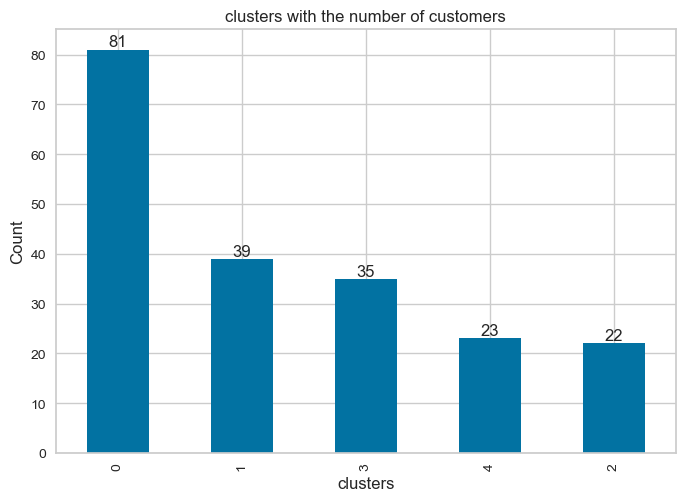

In [106]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_X_annualincome_spendingscore.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [107]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,0
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,1
4,Female,31,17,40,0


In [108]:
df.drop(columns="cluster_Age_Spending_Score", inplace=True)

# According to Annual_Income and Spending_Score,
# we drop the cluster_Age_Spending_Score to get results according to the clusters we created with Kmeans.

In [109]:
df["cluster_Annual_Income_Spending_Score"] = df_X_annualincome_spendingscore.cluster_Kmeans
df.head()
# Add cluster_Annual_Income_Spending_Score column.

,Gender,Age,Annual_Income,Spending_Score,cluster_Annual_Income_Spending_Score
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


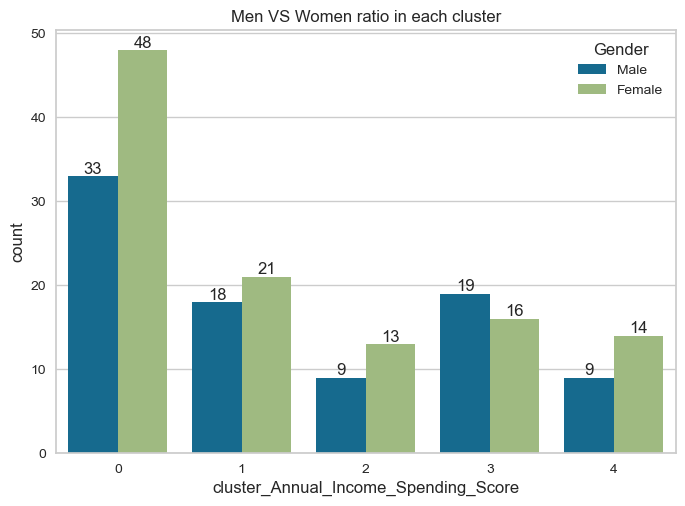

In [110]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [111]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

# here we group df by both Gender and cluster_Annual_Income_Spending_Score.

Age  Annual_Income  \
Gender cluster_Annual_Income_Spending_Score                             
Female 0                                     40.895833      55.354167   
       1                                     32.190476      86.047619   
       2                                     25.461538      25.692308   
       3                                     43.250000      90.937500   
       4                                     43.214286      27.357143   
Male   0                                     45.363636      55.212121   
       1                                     33.277778      87.111111   
       2                                     25.000000      25.777778   
       3                                     39.315789      85.894737   
       4                                     48.333333      24.666667   

                                             Spending_Score  
Gender cluster_Annual_Income_Spending_Score                  
Female 0                                          49.000000  
       1                                          81.666667  
       2                                          80.538462  
       3                                          22.062500  
       4                                          21.714286  
Male   0                                          50.272727  
       1                                          82.666667  
       2                                          77.666667  
       3                                          12.947368  
       4                                          19.666667

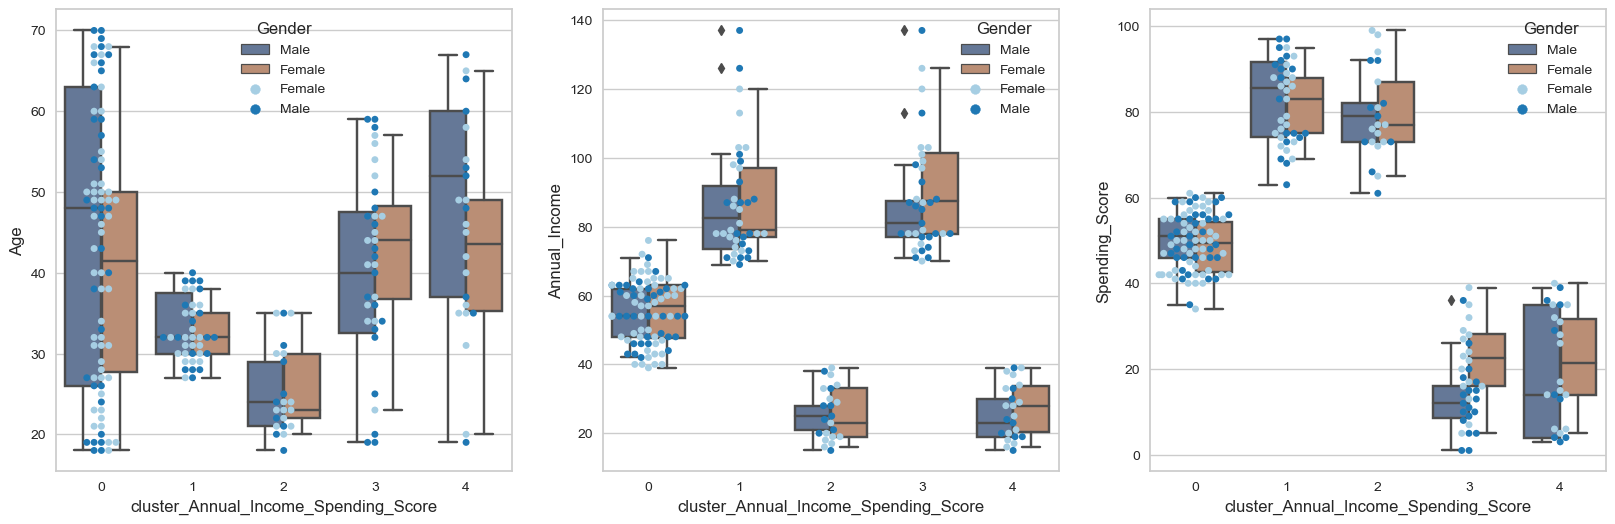

In [112]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Annual_Income_Spending_Score",
            hue= "Gender", data = df,palette="deep",saturation=0.5)
sns.swarmplot(y = "Age", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

plt.subplot(132)
sns.boxplot(y="Annual_Income", x="cluster_Annual_Income_Spending_Score",
            hue="Gender", data = df, palette="deep",saturation=0.5)
sns.swarmplot(y = "Annual_Income", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

plt.subplot(133)
sns.boxplot(y="Spending_Score", x="cluster_Annual_Income_Spending_Score",
            hue="Gender", data=df, palette="deep",saturation=0.5);
sns.swarmplot(y = "Spending_Score", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))
plt.show()

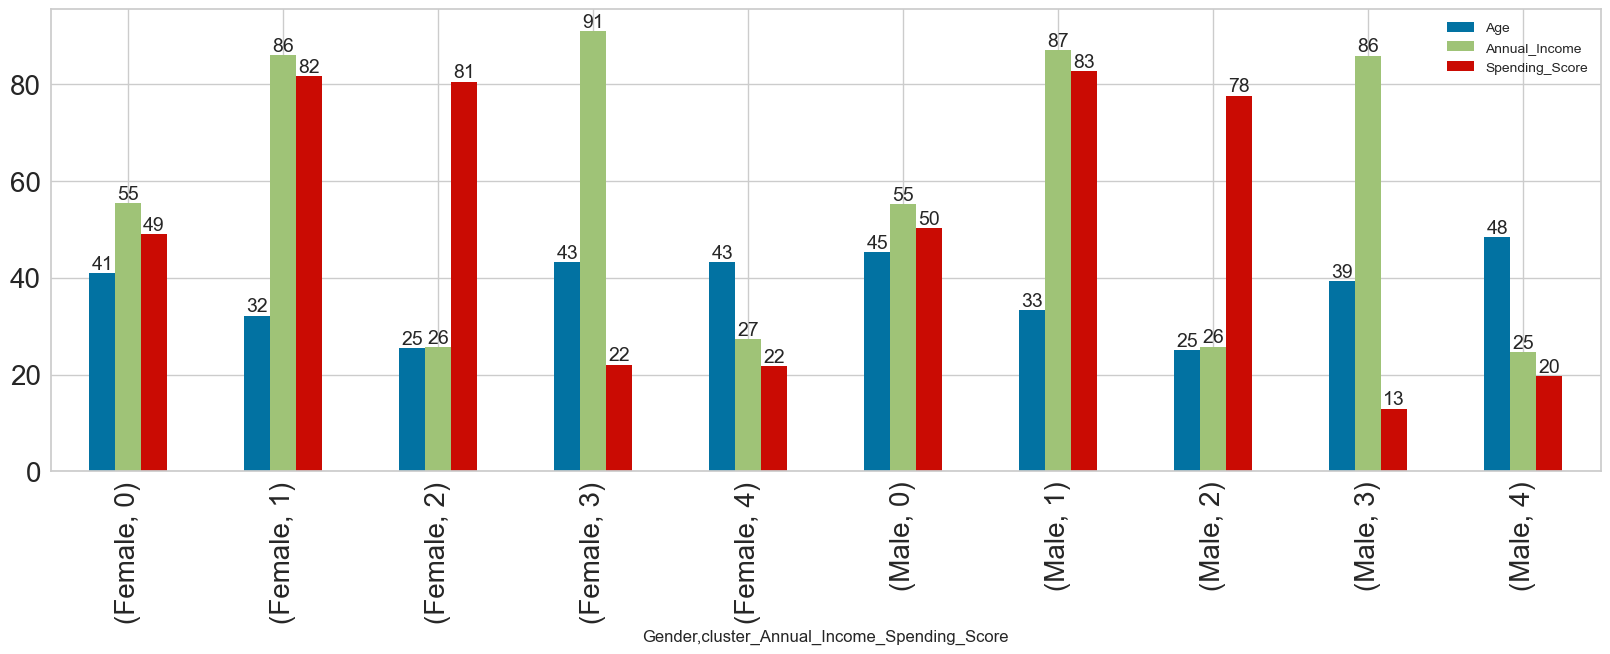

In [113]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

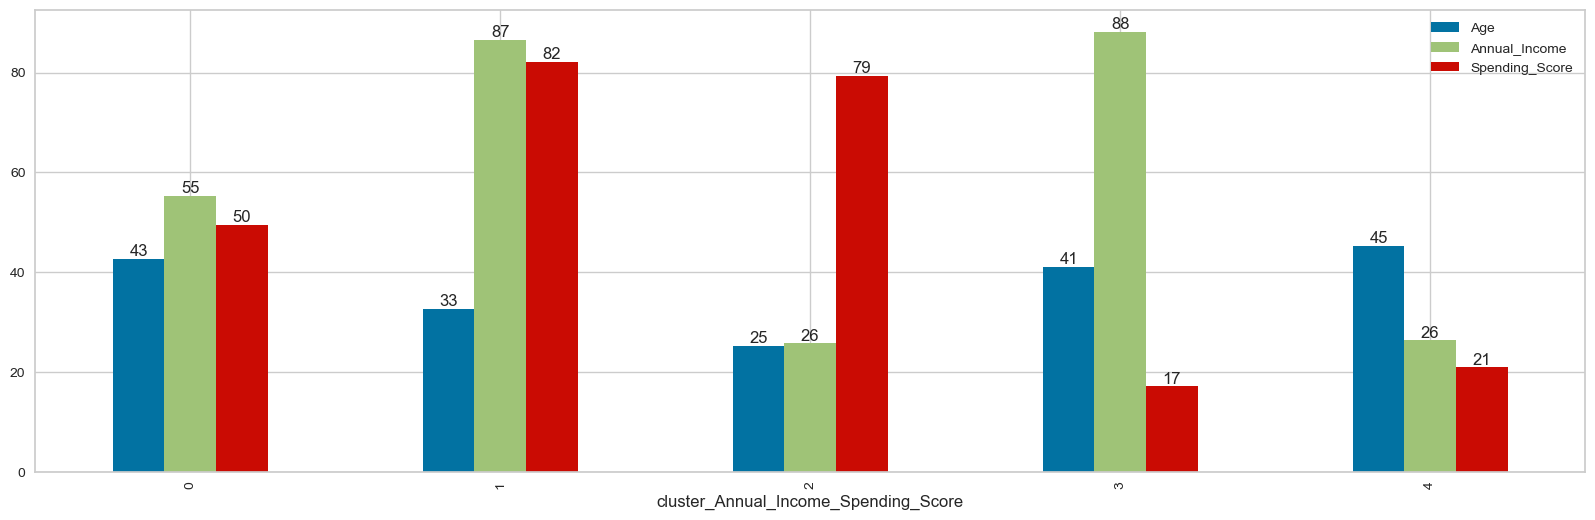

In [114]:
ax = df.groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___